# Which national team is going to be the EURO2020 winner?
## An investigation of the late specialisation as the key to success[1]

[1] https://excelsiorgroup.co.uk/wp-content/uploads/2015/03/late-specialisation-1.pdf

In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [406]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")

### Load the data
The players' data was collected from Wikipedia; you can find the retrieval process in the `retrieve_data.py`.

In [407]:
df = pd.read_csv('data/players_all.csv')
df.head()

,team,name,age,senior_career,youth_career,had_youth_career
0,Czech Republic,Ales Mandous,29,2012–2015,1998–2002,True
1,Czech Republic,Jiri Pavlenka,29,2012–2016,NaN,True
2,Czech Republic,Tomas Vaclik,32,2007–2010,2006–2007,True
3,Czech Republic,Jan Boril,30,2009–2016,NaN,False
4,Czech Republic,Jakub Brabec,28,2008–2011,–2008,True


### Number of players per team


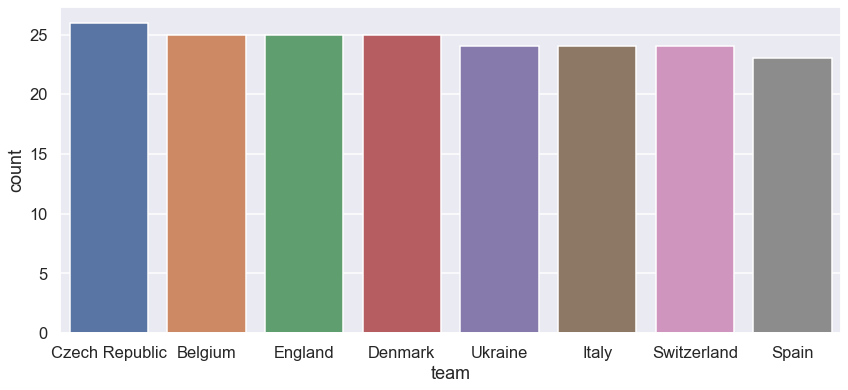

In [431]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='team', data=df, order=df['team'].value_counts().index)

### Percentage of players with no youth career per team

In [409]:
youth_career_nan = df.loc[~df['had_youth_career']]
youth_career_nan

,team,name,age,senior_career,youth_career,had_youth_career
3,Czech Republic,Jan Boril,30,2009–2016,NaN,False
7,Czech Republic,Pavel Kaderabek,29,2010–2015,NaN,False
19,Czech Republic,Petr Sevcik,27,2014–2016,NaN,False
28,Switzerland,Jonas Omlin,27,2012–2014,NaN,False
38,Switzerland,Christian Fassnacht,27,2014,NaN,False
137,Denmark,Anders Christiansen,31,2008–2012,NaN,False
149,Belgium,Matz Sels,29,2010–2014,NaN,False
171,Belgium,Leandro Trossard,26,2012–2019,NaN,False


In [410]:
pcts_youth = []
groups = df.groupby('team')
for name, group in groups:
    pct = group.loc[~group['had_youth_career']].shape[0] / group.shape[0] * 100
    pcts_youth.append((name, pct))

In [411]:
pct_no_youth_df = pd.DataFrame(
    pcts_youth, columns=['team', 'pct_no_youth_career']
).sort_values('pct_no_youth_career', ascending=False)
pct_no_youth_df.head()

,team,pct_no_youth_career
1,Czech Republic,11.538462
6,Switzerland,8.333333
0,Belgium,8.000000
2,Denmark,4.000000
3,England,0.000000


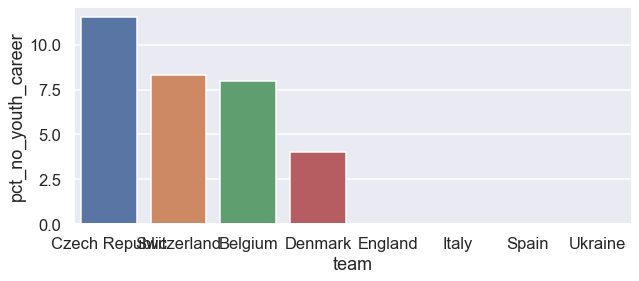

In [412]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.barplot(x='team', y='pct_no_youth_career', data=pct_no_youth_df)

### Age of players per team

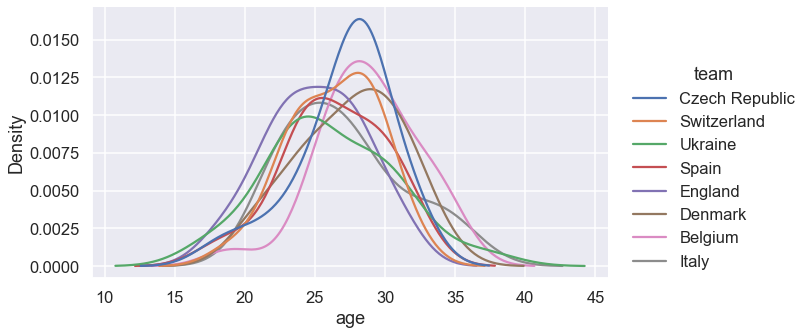

In [413]:
sns.displot(data=df,
            x="age", hue="team", kind="kde", height=5, aspect=1.8)

In [414]:
df.groupby('team')['age'].median()

team
Belgium           29.0
Czech Republic    28.0
Denmark           28.0
England           25.0
Italy             26.5
Spain             26.0
Switzerland       27.0
Ukraine           25.0
Name: age, dtype: float64

### Age started youth career per team 

#### Extracting youth and senior career start year

In [415]:
def find_start_year(x):
    """ Extracts the start year from a range-like column separated by a hyphen"""
    if not type(x) == float:
        limit = x.split('–')[0]
        if '0000' not in limit:
            return limit

In [416]:
df['senior_career_start'] = df['senior_career'].apply(find_start_year)

In [417]:
df['youth_career_start'] = df['youth_career'].apply(find_start_year)

In [418]:
df.head()

,team,name,age,senior_career,youth_career,had_youth_career,senior_career_start,youth_career_start
0,Czech Republic,Ales Mandous,29,2012–2015,1998–2002,True,2012,1998
1,Czech Republic,Jiri Pavlenka,29,2012–2016,NaN,True,2012,None
2,Czech Republic,Tomas Vaclik,32,2007–2010,2006–2007,True,2007,2006
3,Czech Republic,Jan Boril,30,2009–2016,NaN,False,2009,None
4,Czech Republic,Jakub Brabec,28,2008–2011,–2008,True,2008,


In [419]:
df['senior_career_start'] = df['senior_career_start'].astype(int)
# df['youth_career_start'] = df['youth_career_start'].astype(int)

#### Extracting youth and senior start age

In [420]:
def find_age_started_senior(row):
    if row['senior_career_start']:
        return row['age'] - (2021 - row['senior_career_start'])

def find_age_started_youth(row):
    if row['youth_career_start']:
        return row['age'] - (2021 - int(row['youth_career_start']))

In [421]:
df['age_started_senior_career'] = df.apply(find_age_started_senior, axis=1)

In [422]:
df['age_started_youth_career'] = df.apply(find_age_started_youth, axis=1)

In [423]:
df.head()

,team,name,age,senior_career,youth_career,had_youth_career,senior_career_start,youth_career_start,age_started_senior_career,age_started_youth_career
0,Czech Republic,Ales Mandous,29,2012–2015,1998–2002,True,2012,1998,20,6.0
1,Czech Republic,Jiri Pavlenka,29,2012–2016,NaN,True,2012,None,20,NaN
2,Czech Republic,Tomas Vaclik,32,2007–2010,2006–2007,True,2007,2006,18,17.0
3,Czech Republic,Jan Boril,30,2009–2016,NaN,False,2009,None,18,NaN
4,Czech Republic,Jakub Brabec,28,2008–2011,–2008,True,2008,,15,NaN


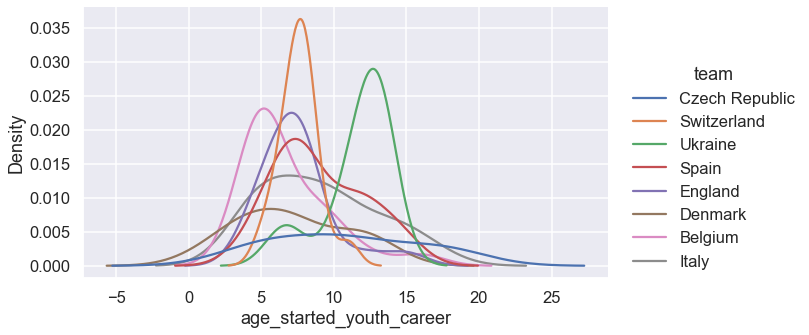

In [424]:
sns.displot(data=df,
            x="age_started_youth_career", hue="team", kind="kde", height=5, aspect=1.8)

In [425]:
df.groupby('team')['age_started_youth_career'].median()

team
Belgium            5.5
Czech Republic    11.0
Denmark            7.0
England            7.0
Italy              9.0
Spain              8.0
Switzerland        8.0
Ukraine           13.0
Name: age_started_youth_career, dtype: float64

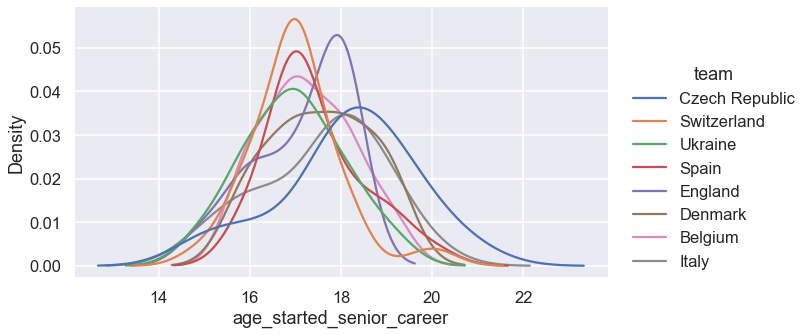

In [426]:
sns.displot(data=df, x="age_started_senior_career", hue="team", kind="kde", height=5, aspect=1.8)

### Age between careers

In [427]:
df['years_between_careers'] = df['age_started_senior_career'] - df['age_started_youth_career']

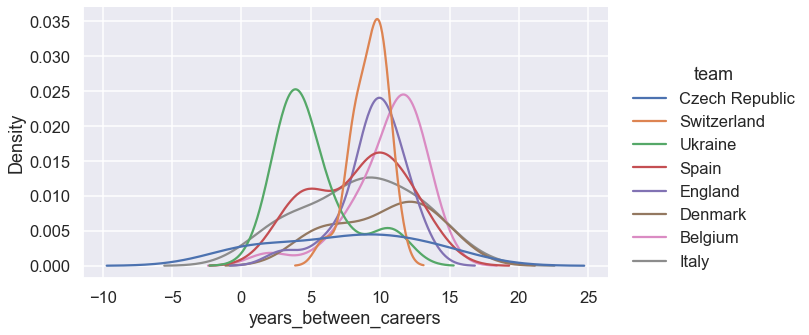

In [428]:
sns.displot(data=df, x="years_between_careers", hue="team", kind="kde", height=5, aspect=1.8)

In [429]:
df.groupby('team')['years_between_careers'].median()

team
Belgium           11.0
Czech Republic     8.0
Denmark           11.5
England           10.0
Italy              9.0
Spain              9.0
Switzerland        9.5
Ukraine            4.0
Name: years_between_careers, dtype: float64